# Logistic Regression Implementation From scratch
 - Code from https://www.youtube.com/watch?v=JDU3AzH3WKg with slight modifications

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from tabulate import tabulate

In [6]:
class LogisticRegression:
    
    def __init__(self, lr=0.001, epoch=1000, threshold = 0.5):
        """Initilize all the variables

           lr - learning rate
           epoch - numbers of iterations
        """
        self.lr = lr
        self.epoch = epoch
        self.threshold = threshold
        self.weights = None
        self.bias = None
        self.log_odds = None
    
    def __sigmoid(self, z):
        """Simulate the sigmoid function"""
        return 1/ (1 + np.exp(-z))

    def __log_odds(self, X):
        """Calculate the return the log odds"""
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        # init parameters
        num_samples, num_features = X.shape
        # init weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # implement gradient descent
        # weights - coefficients
        # bias - intercept
        for _ in range(self.epoch):
            self.log_odds = self.__log_odds(X)
            y_predicted = self.__sigmoid(self.log_odds)
            
            # Derivatives of weights(coefficient)
            # The derivative of log loss for weights is (Y_predicted - Y) * X
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            # Derivatives of bias(intercept)
            # Derivative of log loss for bias is (Y_predicted -Y)
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        self.log_odds = self.__log_odds(X)
        y_predicted = self.__sigmoid(self.log_odds)
        # Apply threshold classification into predicted result
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_class

    def predict_proba(self, X):
        self.log_odds = self.__log_odds(X)
        y_predicted = self.__sigmoid(self.log_odds)
        return y_predicted

In [24]:
# Use sklearn for data testing
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
dataset_labels = bc.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def accuracy(y_pred, y_true):
    """Calculate and return the accuracy of the model"""
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

model = LogisticRegression(lr=0.0001, epoch=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print(f"Model Accuracy: {accuracy(predictions, y_test)}")

# Make a table of all the data
y_test = y_test.tolist()
y_pred = predictions
probabilities = [i * 100 for i in probabilities]

labels = [["Y_test", "Y_test", "probabilities"]]
data = [[y_test[i], y_pred[i],probabilities[i]] for i in range(len(y_pred))]
final_table = labels + data
print(tabulate(final_table, headers='firstrow', tablefmt='fancy_grid'))


Model Accuracy: 0.9298245614035088
╒══════════╤══════════╤═════════════════╕
│   Y_test │   Y_test │   probabilities │
╞══════════╪══════════╪═════════════════╡
│        1 │        1 │    99.947       │
├──────────┼──────────┼─────────────────┤
│        1 │        1 │    99.9994      │
├──────────┼──────────┼─────────────────┤
│        1 │        1 │    99.9975      │
├──────────┼──────────┼─────────────────┤
│        1 │        1 │    99.9996      │
├──────────┼──────────┼─────────────────┤
│        1 │        1 │    99.8964      │
├──────────┼──────────┼─────────────────┤
│        1 │        1 │    99.9998      │
├──────────┼──────────┼─────────────────┤
│        0 │        0 │    22.8824      │
├──────────┼──────────┼─────────────────┤
│        1 │        1 │    99.9994      │
├──────────┼──────────┼─────────────────┤
│        0 │        0 │     4.73234e-18 │
├──────────┼──────────┼─────────────────┤
│        0 │        0 │     3.2495e-09  │
├──────────┼──────────┼─────────────────┤

1:mean radius, 0.031526753820831054
2:mean texture, 0.04385926904287718
3:mean perimeter, 0.1823946371662648
4:mean area, 0.07276572888268544
5:worst radius, 0.03336367655167691
6:worst texture, 0.055814613381939694
7:worst perimeter, 0.18289726887908322


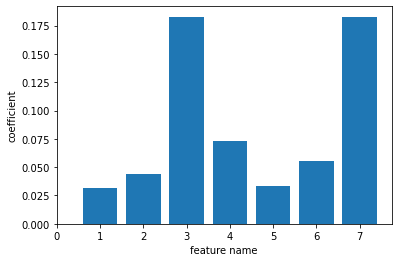

In [23]:
# Plot bar graph for all the significant coefficients
coefficients = model.weights.tolist()
# Filter out only data with a coef bigger than 0.01
data = [[abs(coefficients[i]),dataset_labels[i]] for i in range(len(coefficients)) if coefficients[i] > 0.01]
# Print Labels reference table
for i in range(len(data)):
    print(f"{i+1}:{data[i][1]}, {data[i][0]}")
data_coefs = [data[i][0] for i in range(len(data))]
plt.bar([i+1 for i in range(len(data))],data_coefs)
plt.xticks([i for i in range(len(data)+1)],[i for i in range(len(data)+1)])
plt.xlabel('feature name')
plt.ylabel('coefficient')
 
plt.show()